Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/oasis_longitudinal.csv')

# Fill missing SES using median within EDUC groups
df["SES"] = df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"))

# Fill missing MMSE using overall median
df["MMSE"] = df["MMSE"].fillna(df["MMSE"].median())

# Show missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Save the updated dataset
df.to_csv('/content/oasis_preprocessed.csv', index=False)
print("\nCleaned dataset saved as 'oasis_preprocessed.csv'")



Missing Values After Cleaning:
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

Cleaned dataset saved as 'oasis_preprocessed.csv'


In [2]:
# STEP 1.2: Encode Categorical Variables
import pandas as pd

# Load dataset after missing value handling
df = pd.read_csv('/content/oasis_preprocessed.csv')

# Encode Gender: M = 1, F = 0
df['M/F'] = df['M/F'].replace({'M': 1, 'F': 0})

# Encode Group: Nondemented = 0, Demented/Converted = 1
df['Group'] = df['Group'].replace({'Nondemented': 0, 'Converted': 1, 'Demented': 1})

# Drop columns that are not useful for modeling
df.drop(columns=['Subject ID', 'MRI ID', 'Hand'], inplace=True, errors='ignore')

# Save encoded dataset
df.to_csv('/content/oasis_encoded.csv', index=False)

# Show the encoding result
print("Encoding completed. Here's the preview:")
print(df[['M/F', 'Group']].head())
print("\nEncoded dataset saved as 'oasis_encoded.csv'")


Encoding completed. Here's the preview:
   M/F  Group
0    1      0
1    1      0
2    1      1
3    1      1
4    1      1

Encoded dataset saved as 'oasis_encoded.csv'


<ipython-input-2-1a0faff2bbc8>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['M/F'] = df['M/F'].replace({'M': 1, 'F': 0})
<ipython-input-2-1a0faff2bbc8>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Group'] = df['Group'].replace({'Nondemented': 0, 'Converted': 1, 'Demented': 1})


In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load encoded dataset
df = pd.read_csv('/content/oasis_encoded.csv')

# Scale selected features
scaler = MinMaxScaler()
df[['eTIV', 'nWBV', 'ASF']] = scaler.fit_transform(df[['eTIV', 'nWBV', 'ASF']])

# Save the scaled dataset
df.to_csv('/content/oasis_scaled.csv', index=False)

# Display scaled features preview
print("Feature scaling completed. Preview of scaled features:")
print(df[['eTIV', 'nWBV', 'ASF']].head())

print("Scaled dataset saved as 'oasis_scaled.csv'")


Feature scaling completed. Preview of scaled features:
       eTIV      nWBV       ASF
0  0.981069  0.269430  0.009845
1  1.000000  0.191710  0.000000
2  0.636971  0.476684  0.239100
3  0.703786  0.357513  0.188467
4  0.659243  0.295337  0.222222
Scaled dataset saved as 'oasis_scaled.csv'


In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the scaled dataset
df = pd.read_csv('/content/oasis_scaled.csv')

# Use CDR as multi-class target
df['CDR'] = pd.read_csv('/content/oasis_preprocessed.csv')['CDR']
cdr_mapping = {0.0: 0, 0.5: 1, 1.0: 2, 2.0: 3}
df['label'] = df['CDR'].map(cdr_mapping)

# Drop original CDR and unnecessary columns
df.drop(columns=['CDR'], inplace=True)

# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Save datasets
X_train.to_csv('/content/X_train.csv', index=False)
X_test.to_csv('/content/X_test.csv', index=False)
y_train.to_csv('/content/y_train.csv', index=False)
y_test.to_csv('/content/y_test.csv', index=False)

# Show distributions
print("Train-test split for multi-class classification completed.")
print(f"y_train distribution:\n{y_train.value_counts().sort_index()}")
print(f"y_test distribution:\n{y_test.value_counts().sort_index()}")


Train-test split for multi-class classification completed.
y_train distribution:
label
0    165
1     98
2     33
3      2
Name: count, dtype: int64
y_test distribution:
label
0    41
1    25
2     8
3     1
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load base dataset with CDR column for accurate plotting
df = pd.read_csv('/content/oasis_preprocessed.csv')

# Map CDR to multi-class labels
cdr_mapping = {0.0: 0, 0.5: 1, 1.0: 2, 2.0: 3}
df['label'] = df['CDR'].map(cdr_mapping)
df = df[df['label'].notnull()]  # Drop rows without valid CDR

# Convert label to int
df['label'] = df['label'].astype(int)


EDA

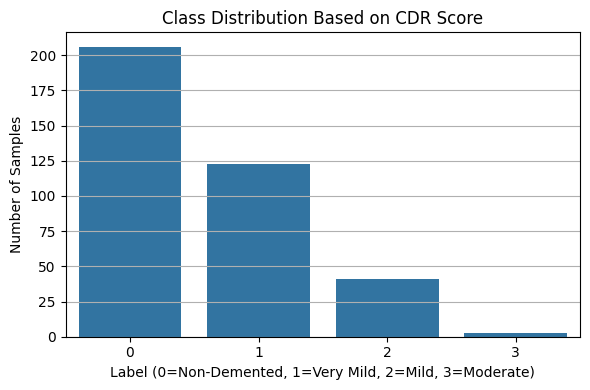

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution Based on CDR Score')
plt.xlabel('Label (0=Non-Demented, 1=Very Mild, 2=Mild, 3=Moderate)')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


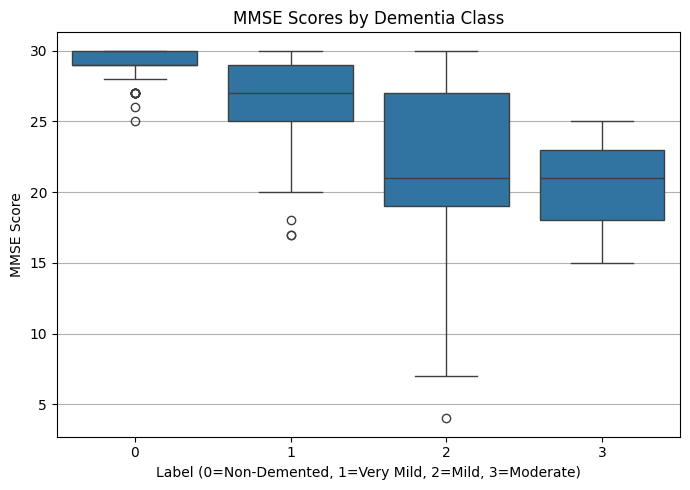

In [7]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='MMSE', data=df)
plt.title('MMSE Scores by Dementia Class')
plt.xlabel('Label (0=Non-Demented, 1=Very Mild, 2=Mild, 3=Moderate)')
plt.ylabel('MMSE Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


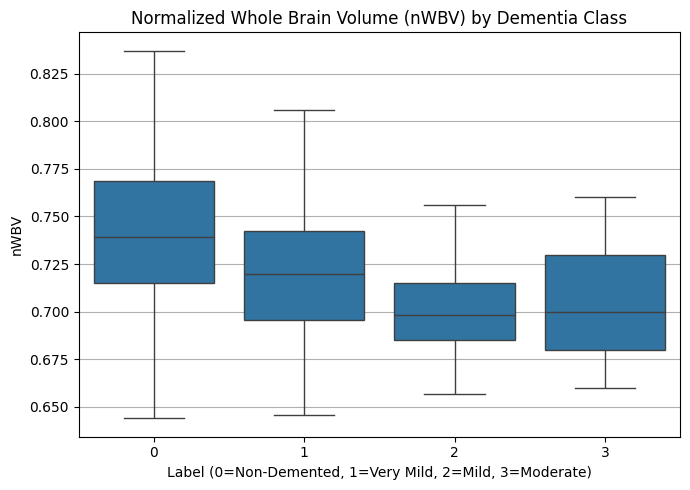

In [8]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='nWBV', data=df)
plt.title('Normalized Whole Brain Volume (nWBV) by Dementia Class')
plt.xlabel('Label (0=Non-Demented, 1=Very Mild, 2=Mild, 3=Moderate)')
plt.ylabel('nWBV')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-9-6dcc8cb3ec0a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='MMSE', palette='viridis')
<ipython-input-9-6dcc8cb3ec0a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='nWBV', palette='viridis')


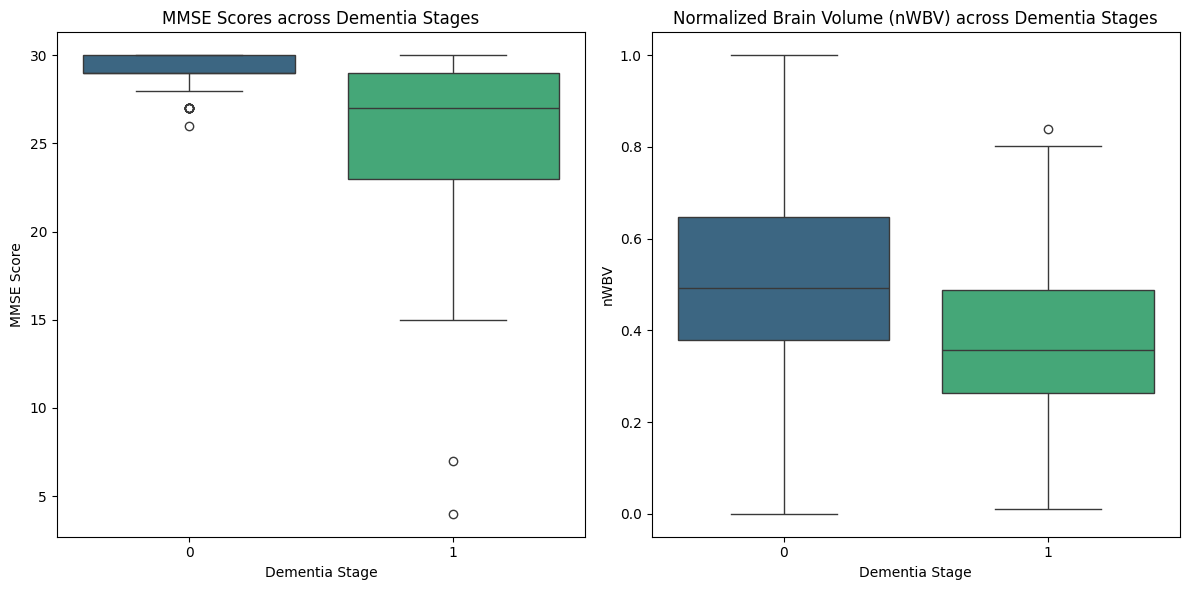

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/oasis_scaled.csv')  # Adjust to your file path

# Box plot to compare MMSE vs nWBV across the dementia stages
plt.figure(figsize=(12, 6))

# MMSE vs Group (Dementia Stages)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Group', y='MMSE', palette='viridis')
plt.title('MMSE Scores across Dementia Stages')
plt.xlabel('Dementia Stage')
plt.ylabel('MMSE Score')

# nWBV vs Group (Dementia Stages)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Group', y='nWBV', palette='viridis')
plt.title('Normalized Brain Volume (nWBV) across Dementia Stages')
plt.xlabel('Dementia Stage')
plt.ylabel('nWBV')

plt.tight_layout()
plt.show()


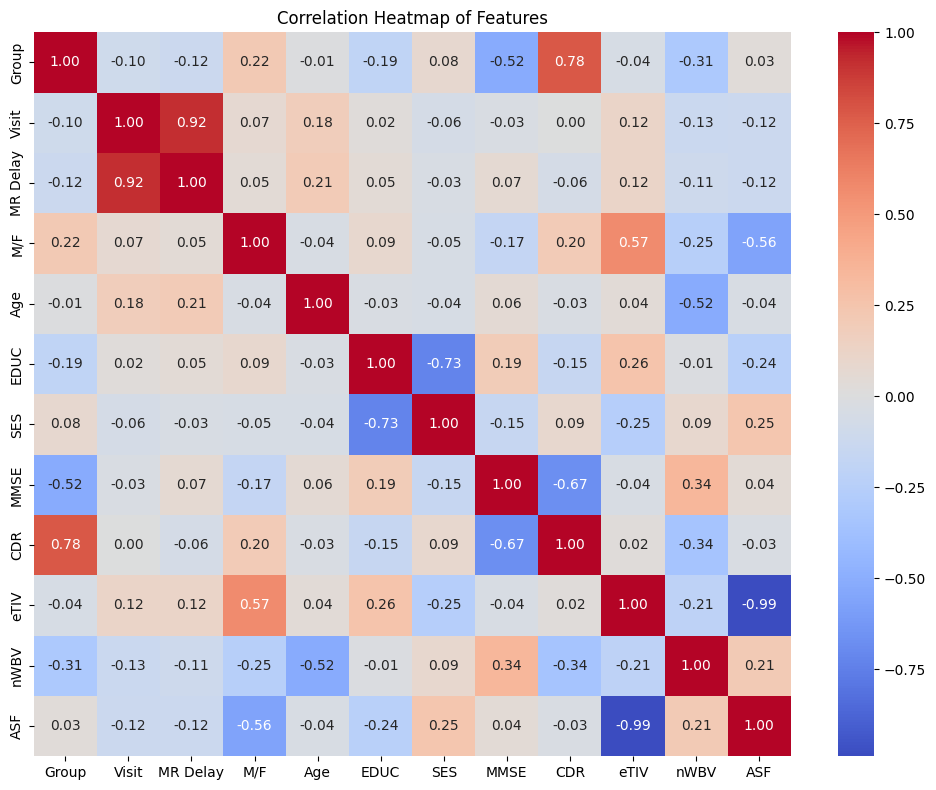

In [11]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


**Logistic Regression**





In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load train-test data
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv').squeeze()
y_test = pd.read_csv('/content/y_test.csv').squeeze()

# Drop leakage columns if they exist
X_train = X_train.drop(columns=['Group', 'CDR'], errors='ignore')
X_test = X_test.drop(columns=['Group', 'CDR'], errors='ignore')

# Initialize model
lr_model = LogisticRegression(max_iter=2000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Logistic Regression):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

print(f"\nAccuracy Score (Logistic Regression): {accuracy_score(y_test, y_pred):.4f}")

# Save results
df_lr_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_lr_results.to_csv('/content/logistic_regression_results.csv', index=False)
print("Saved to 'logistic_regression_results_cleaned.csv'")


Confusion Matrix (Logistic Regression):
[[31  7  2  1]
 [ 9  9  6  1]
 [ 1  2  5  0]
 [ 0  0  0  1]]

Classification Report (Logistic Regression):
                 precision    recall  f1-score   support

0: Non-Demented       0.76      0.76      0.76        41
   1: Very Mild       0.50      0.36      0.42        25
        2: Mild       0.38      0.62      0.48         8
    3: Moderate       0.33      1.00      0.50         1

       accuracy                           0.61        75
      macro avg       0.49      0.69      0.54        75
   weighted avg       0.63      0.61      0.61        75


Accuracy Score (Logistic Regression): 0.6133
Saved to 'logistic_regression_results_cleaned.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random** **Forest**

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# STEP 1: Load your data
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv').squeeze()
y_test = pd.read_csv('/content/y_test.csv').squeeze()

# STEP 2: Remove 'Group' if it exists (this is the mistake!)
X_train = X_train.drop(columns=['Group'], errors='ignore')
X_test = X_test.drop(columns=['Group'], errors='ignore')

# STEP 3: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# STEP 4: Evaluation
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Random Forest):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

print(f"\nAccuracy Score (Random Forest): {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix (Random Forest):
[[35  6  0  0]
 [ 8 16  1  0]
 [ 2  4  2  0]
 [ 0  0  1  0]]

Classification Report (Random Forest):
                 precision    recall  f1-score   support

0: Non-Demented       0.78      0.85      0.81        41
   1: Very Mild       0.62      0.64      0.63        25
        2: Mild       0.50      0.25      0.33         8
    3: Moderate       0.00      0.00      0.00         1

       accuracy                           0.71        75
      macro avg       0.47      0.44      0.44        75
   weighted avg       0.68      0.71      0.69        75


Accuracy Score (Random Forest): 0.7067


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


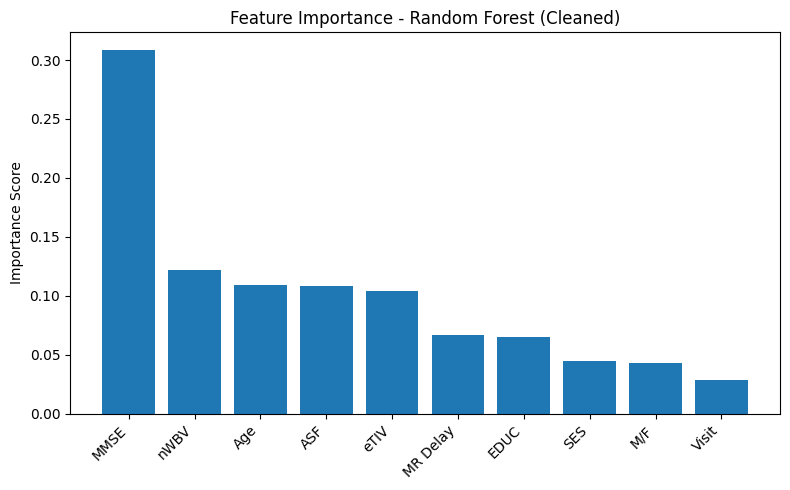

In [14]:

importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Random Forest (Cleaned)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


**KNN**

In [15]:
!pip install imbalanced-learn


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix(KNN):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report(KNN):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

print(f"\nAccuracy Score(KNN): {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix(KNN):
[[33  7  0  1]
 [13 10  1  1]
 [ 1  4  3  0]
 [ 0  1  0  0]]

Classification Report(KNN):
                 precision    recall  f1-score   support

0: Non-Demented       0.70      0.80      0.75        41
   1: Very Mild       0.45      0.40      0.43        25
        2: Mild       0.75      0.38      0.50         8
    3: Moderate       0.00      0.00      0.00         1

       accuracy                           0.61        75
      macro avg       0.48      0.39      0.42        75
   weighted avg       0.62      0.61      0.61        75


Accuracy Score(KNN): 0.6133


**XGBoost**

In [18]:
!pip install xgboost


In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (XGBoost):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

print(f"\nAccuracy Score (XGBoost): {accuracy_score(y_test, y_pred):.4f}")
# Save predicted vs actual
df_xgb_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_xgb_results.to_csv('/content/xgboost_results.csv', index=False)
print("Predictions saved to 'xgboost_results.csv'")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:30:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix (XGBoost):
[[33  8  0  0]
 [ 7 16  2  0]
 [ 1  5  2  0]
 [ 0  1  0  0]]

Classification Report (XGBoost):
                 precision    recall  f1-score   support

0: Non-Demented       0.80      0.80      0.80        41
   1: Very Mild       0.53      0.64      0.58        25
        2: Mild       0.50      0.25      0.33         8
    3: Moderate       0.00      0.00      0.00         1

       accuracy                           0.68        75
      macro avg       0.46      0.42      0.43        75
   weighted avg       0.67      0.68      0.67        75


Accuracy Score (XGBoost): 0.6800
Predictions saved to 'xgboost_results.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Naive Bayes**

In [20]:
import pandas as pd

# Load the train-test data
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv').squeeze()
y_test = pd.read_csv('/content/y_test.csv').squeeze()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)
# Confusion Matrix
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Naive Bayes):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

# Accuracy
print(f"\nAccuracy Score (Naive Bayes): {accuracy_score(y_test, y_pred):.4f}")
# Save predicted vs actual
df_nb_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_nb_results.to_csv('/content/naive_bayes_results.csv', index=False)
print("Predictions saved to 'naive_bayes_results.csv'")


Confusion Matrix (Naive Bayes):
[[39  2  0  0]
 [ 0 15 10  0]
 [ 0  1  7  0]
 [ 0  0  1  0]]

Classification Report (Naive Bayes):
                 precision    recall  f1-score   support

0: Non-Demented       1.00      0.95      0.97        41
   1: Very Mild       0.83      0.60      0.70        25
        2: Mild       0.39      0.88      0.54         8
    3: Moderate       0.00      0.00      0.00         1

       accuracy                           0.81        75
      macro avg       0.56      0.61      0.55        75
   weighted avg       0.87      0.81      0.82        75


Accuracy Score (Naive Bayes): 0.8133
Predictions saved to 'naive_bayes_results.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**SVM**

In [21]:
import pandas as pd

# Load the train-test data
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv').squeeze()
y_test = pd.read_csv('/content/y_test.csv').squeeze()
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)
# Confusion Matrix
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (SVM):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

# Accuracy
print(f"\nAccuracy Score (SVM): {accuracy_score(y_test, y_pred):.4f}")
# Save predicted vs actual
df_svm_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_svm_results.to_csv('/content/svm_results.csv', index=False)
print("Predictions saved to 'svm_results.csv'")


Confusion Matrix (SVM):
[[39  2  0  0]
 [ 0 21  4  0]
 [ 0  3  5  0]
 [ 0  0  0  1]]

Classification Report (SVM):
                 precision    recall  f1-score   support

0: Non-Demented       1.00      0.95      0.97        41
   1: Very Mild       0.81      0.84      0.82        25
        2: Mild       0.56      0.62      0.59         8
    3: Moderate       1.00      1.00      1.00         1

       accuracy                           0.88        75
      macro avg       0.84      0.85      0.85        75
   weighted avg       0.89      0.88      0.88        75


Accuracy Score (SVM): 0.8800
Predictions saved to 'svm_results.csv'


**Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)
# Confusion Matrix
print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Gradient Boosting):")
print(classification_report(
    y_test, y_pred,
    target_names=["0: Non-Demented", "1: Very Mild", "2: Mild", "3: Moderate"]
))

# Accuracy
print(f"\nAccuracy Score (Gradient Boosting): {accuracy_score(y_test, y_pred):.4f}")
# Save predicted vs actual
df_gb_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_gb_results.to_csv('/content/gradient_boosting_results.csv', index=False)
print("Predictions saved to 'gradient_boosting_results.csv'")


Confusion Matrix (Gradient Boosting):
[[39  2  0  0]
 [ 1 23  1  0]
 [ 0  6  2  0]
 [ 0  1  0  0]]

Classification Report (Gradient Boosting):
                 precision    recall  f1-score   support

0: Non-Demented       0.97      0.95      0.96        41
   1: Very Mild       0.72      0.92      0.81        25
        2: Mild       0.67      0.25      0.36         8
    3: Moderate       0.00      0.00      0.00         1

       accuracy                           0.85        75
      macro avg       0.59      0.53      0.53        75
   weighted avg       0.84      0.85      0.83        75


Accuracy Score (Gradient Boosting): 0.8533
Predictions saved to 'gradient_boosting_results.csv'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Performance Comparsion**

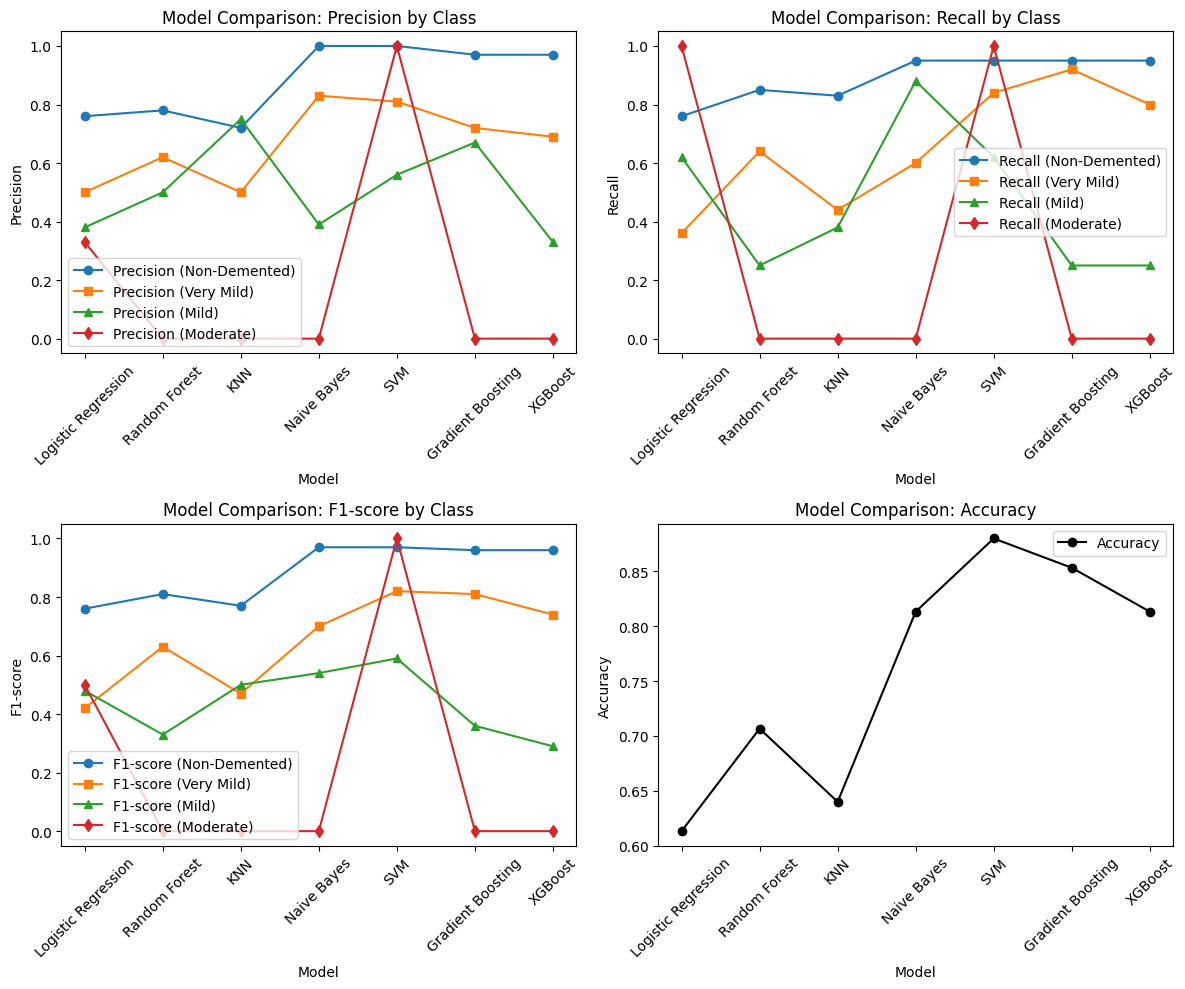

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the results
data = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Naive Bayes", "SVM", "Gradient Boosting", "XGBoost"],
    "Precision (Non-Demented)": [0.76, 0.78, 0.72, 1.00, 1.00, 0.97, 0.97],
    "Precision (Very Mild)": [0.50, 0.62, 0.50, 0.83, 0.81, 0.72, 0.69],
    "Precision (Mild)": [0.38, 0.50, 0.75, 0.39, 0.56, 0.67, 0.33],
    "Precision (Moderate)": [0.33, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00],
    "Recall (Non-Demented)": [0.76, 0.85, 0.83, 0.95, 0.95, 0.95, 0.95],
    "Recall (Very Mild)": [0.36, 0.64, 0.44, 0.60, 0.84, 0.92, 0.80],
    "Recall (Mild)": [0.62, 0.25, 0.38, 0.88, 0.62, 0.25, 0.25],
    "Recall (Moderate)": [1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00],
    "F1-score (Non-Demented)": [0.76, 0.81, 0.77, 0.97, 0.97, 0.96, 0.96],
    "F1-score (Very Mild)": [0.42, 0.63, 0.47, 0.70, 0.82, 0.81, 0.74],
    "F1-score (Mild)": [0.48, 0.33, 0.50, 0.54, 0.59, 0.36, 0.29],
    "F1-score (Moderate)": [0.50, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00],
    "Accuracy": [0.6133, 0.7067, 0.6400, 0.8133, 0.8800, 0.8533, 0.8133]
}

df = pd.DataFrame(data)

# Set the figure size for better visibility
plt.figure(figsize=(12, 10))

# Plot Precision by Class
plt.subplot(2, 2, 1)
plt.plot(df["Model"], df["Precision (Non-Demented)"], label="Precision (Non-Demented)", marker='o')
plt.plot(df["Model"], df["Precision (Very Mild)"], label="Precision (Very Mild)", marker='s')
plt.plot(df["Model"], df["Precision (Mild)"], label="Precision (Mild)", marker='^')
plt.plot(df["Model"], df["Precision (Moderate)"], label="Precision (Moderate)", marker='d')
plt.title("Model Comparison: Precision by Class")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.legend()

# Plot Recall by Class
plt.subplot(2, 2, 2)
plt.plot(df["Model"], df["Recall (Non-Demented)"], label="Recall (Non-Demented)", marker='o')
plt.plot(df["Model"], df["Recall (Very Mild)"], label="Recall (Very Mild)", marker='s')
plt.plot(df["Model"], df["Recall (Mild)"], label="Recall (Mild)", marker='^')
plt.plot(df["Model"], df["Recall (Moderate)"], label="Recall (Moderate)", marker='d')
plt.title("Model Comparison: Recall by Class")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.legend()

# Plot F1-score by Class
plt.subplot(2, 2, 3)
plt.plot(df["Model"], df["F1-score (Non-Demented)"], label="F1-score (Non-Demented)", marker='o')
plt.plot(df["Model"], df["F1-score (Very Mild)"], label="F1-score (Very Mild)", marker='s')
plt.plot(df["Model"], df["F1-score (Mild)"], label="F1-score (Mild)", marker='^')
plt.plot(df["Model"], df["F1-score (Moderate)"], label="F1-score (Moderate)", marker='d')
plt.title("Model Comparison: F1-score by Class")
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.xticks(rotation=45)
plt.legend()

# Plot Accuracy
plt.subplot(2, 2, 4)
plt.plot(df["Model"], df["Accuracy"], label="Accuracy", marker='o', color='black')
plt.title("Model Comparison: Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
# For ML models and cross-validation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [27]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/oasis_scaled.csv')  # Your dataset
df['CDR'] = pd.read_csv('/content/oasis_preprocessed.csv')['CDR']  # Add CDR column

# Preprocessing data
cdr_mapping = {0.0: 0, 0.5: 1, 1.0: 2, 2.0: 3}
df['label'] = df['CDR'].map(cdr_mapping)
df.drop(columns=['CDR'], inplace=True)

X = df.drop(columns=['label'])
y = df['label']

# Split the data (cross-validation will be handled here)
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of classifiers to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),  # Increased max_iter to handle convergence
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()  # Add XGBoost
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"\nEvaluating model: {model_name}")

    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

    # Store the results
    cv_results[model_name] = {
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std(),
    }

    print(f"Cross-validated accuracy for {model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Convert results to a DataFrame for easy reading
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results:")
print(cv_results_df)

# Save results to a CSV if needed
cv_results_df.to_csv('/content/model_cv_results.csv')




Evaluating model: Logistic Regression
Cross-validated accuracy for Logistic Regression: 0.8472 ± 0.0393

Evaluating model: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy for Random Forest: 0.8445 ± 0.0184

Evaluating model: KNN
Cross-validated accuracy for KNN: 0.8471 ± 0.0256

Evaluating model: Naive Bayes


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy for Naive Bayes: 0.6269 ± 0.1056

Evaluating model: SVM
Cross-validated accuracy for SVM: 0.8471 ± 0.0269

Evaluating model: Gradient Boosting


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy for Gradient Boosting: 0.8445 ± 0.0235

Evaluating model: XGBoost


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy for XGBoost: 0.8364 ± 0.0104

Cross-Validation Results:
                     mean_accuracy  std_accuracy
Logistic Regression       0.847207      0.039318
Random Forest             0.844468      0.018370
KNN                       0.847063      0.025551
Naive Bayes               0.626919      0.105613
SVM                       0.847063      0.026942
Gradient Boosting         0.844468      0.023510
XGBoost                   0.836432      0.010415


<ipython-input-28-e38b93dff31a>:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(models, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, color='blue', ecolor='red', linestyle='-', markerfacecolor='green')


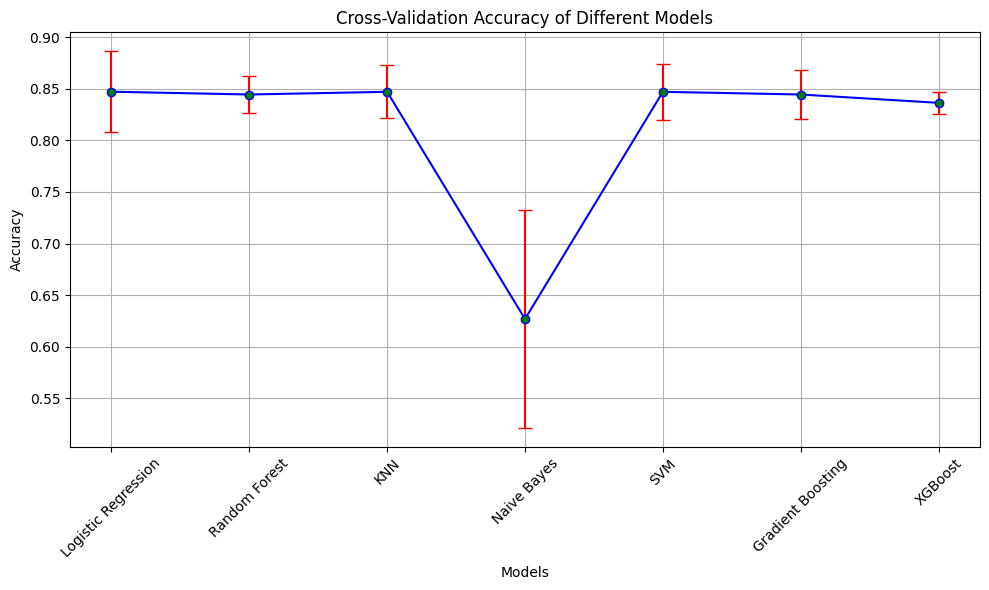

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data from cross-validation results
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Gradient Boosting', 'XGBoost']
mean_accuracies = [0.8472, 0.8445, 0.8471, 0.6269, 0.8471, 0.8445, 0.8364]  # replace with your actual mean accuracies
std_accuracies = [0.0393, 0.0184, 0.0256, 0.1056, 0.0269, 0.0235, 0.0104]  # replace with your actual std accuracies

# Creating the plot
plt.figure(figsize=(10,6))
plt.errorbar(models, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, color='blue', ecolor='red', linestyle='-', markerfacecolor='green')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust the layout so that everything fits

# Show the plot
plt.show()
